In [2]:
from Monitoring import *
from Graphing import *

In [3]:
# Script options
past_t = 24 * 60 * 60  # How far in the past we want to look (maximum)
past_t_cpu = 24 * 60 * 60  # How far back we want to look at cpu (etc) for
# past_t_cpu = 60 * 60  # How far back we want to look at cpu (etc) for
# past_t_cpu = 0.5 * 60 * 60  # How far back we want to look at cpu (etc) for

In [4]:
n_past = int(past_t // monitoring_interval)
n_past_cpu = int(past_t_cpu // monitoring_interval)
host_data = [None for _ in hosts]
def update_data():
    t = time.time()
    for i in range(len(hosts)):
        host = hosts[i]
        data = []
        with open(traffic_history_csv + '_' + host["regions"] + '.csv', 'r') as f:
            data_lines = deque(f, n_past)
            for line in data_lines:
                data.append(np.asarray(list(map(float, line.split(',')))))
        host_data[i] = np.asarray(data)
        # Make timestamps relative and in minutes
        host_data[i][:, 0] = ((host_data[i][:, 0] - t) / 60.0)

In [5]:
from IPython.display import clear_output
%matplotlib inline

def live_plot(regions, data, figsize=(17,30), title=''):
    clear_output(wait=True)
#     plt.figure(figsize=figsize)
    f, axarr = plt.subplots(9, 4, gridspec_kw={'width_ratios': [1, 8, 1, 8]})
    for i in range(len(data)):
        plt.title(regions[i])
        d = data[i]
        y_l = (0,np.max(d[-n_past:, 1]))
        axarr[0, 0 + (i * 2)].bar(d[-1:, 0], d[-1:, 1]) # n_workers
        axarr[0, 0 + (i * 2)].set_ylim(y_l)
        axarr[0, 0 + (i * 2)].grid(True)
        axarr[0, 1 + (i * 2)].plot(d[-n_past:, 0], d[-n_past:, 1])
        axarr[0, 1 + (i * 2)].set_ylim(y_l)
        axarr[0, 1 + (i * 2)].grid(True)
        axarr[0, 1 + (i * 2)].set_xlim()
        axarr[1, 0 + (i * 2)].bar(d[-1:, 0], d[-1:, 2]) # cpu%
        axarr[1, 0 + (i * 2)].set_ylim((0, 100))
        axarr[1, 0 + (i * 2)].grid(True)
        axarr[1, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 2])
        axarr[1, 1 + (i * 2)].set_ylim((0, 100))
        axarr[1, 1 + (i * 2)].grid(True)
        axarr[1, 1 + (i * 2)].set_title("mean CPU %")
        axarr[2, 0 + (i * 2)].bar(d[-1:, 0], d[-1:, 3]) # ram%
        axarr[2, 0 + (i * 2)].set_ylim((0, 100))
        axarr[2, 0 + (i * 2)].grid(True)
        axarr[2, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 3])
        axarr[2, 1 + (i * 2)].set_ylim((0, 100))
        axarr[2, 1 + (i * 2)].grid(True)
        axarr[2, 1 + (i * 2)].set_title("mean RAM %")
        y_l = (0,np.max(d[-n_past_cpu:, 4]))
        axarr[3, 0 + (i * 2)].bar(d[-1:, 0], d[-1:, 4]) # MbitUp
        axarr[3, 0 + (i * 2)].set_ylim(y_l)
        axarr[3, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 4])
        axarr[3, 1 + (i * 2)].set_ylim(y_l)
        axarr[3, 1 + (i * 2)].grid(True)
        axarr[3, 1 + (i * 2)].set_title("Mbit upload total")
        y_l = (0,np.max(d[-n_past_cpu:, 5]))
        axarr[4, 0 + (i * 2)].bar(d[-1:, 0], d[-1:, 5]) # MbitDown
        axarr[4, 0 + (i * 2)].set_ylim(y_l)
        axarr[4, 0 + (i * 2)].grid(True)
        axarr[4, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 5])
        axarr[4, 1 + (i * 2)].set_ylim(y_l)
        axarr[4, 1 + (i * 2)].grid(True)
        axarr[4, 1 + (i * 2)].set_title("Mbit download total")
        y_l = (0,np.max(np.hstack([d[-n_past_cpu:,6],d[-n_past_cpu:,10]])))
#         y_l = (0,np.max(np.hstack([d[-n_past_cpu:,6],d[-n_past_cpu:,16],d[-n_past_cpu:,13],d[-n_past_cpu:,10]])))
        axarr[5, 0 + (i * 2)].bar(d[-1:, 0], d[-1:, 6]) # mp_active
        axarr[5, 0 + (i * 2)].axhline(d[-1, 16], color='orange', linestyle='--')
        axarr[5, 0 + (i * 2)].axhline(d[-1, 13], color='purple', linestyle='--')
        axarr[5, 0 + (i * 2)].axhline(d[-1, 10], color='red', linestyle='-')
        axarr[5, 0 + (i * 2)].set_ylim(y_l)
        axarr[5, 0 + (i * 2)].grid(True)
        axarr[5, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 6], label="Active")
        axarr[5, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 16], label="Max pool size", color='orange')
        axarr[5, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 13], label="Pool size", color='purple')
        axarr[5, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 10], label="Queue size", color='red')
        axarr[5, 1 + (i * 2)].axhline(d[-1, 16], color='orange', linestyle='--')
        axarr[5, 1 + (i * 2)].axhline(d[-1, 13], color='purple', linestyle='--')
        axarr[5, 1 + (i * 2)].axhline(d[-1, 10], color='red', linestyle='-')
        axarr[5, 1 + (i * 2)].set_ylim(y_l)
        axarr[5, 1 + (i * 2)].grid(True)
        axarr[5, 1 + (i * 2)].set_title("Active match predictions")
#         y_l = (0,np.max(np.hstack([d[-n_past_cpu,7],d[-n_past_cpu:,17]])))
        y_l = (0,np.max(d[-n_past_cpu:,7]))
        axarr[6, 0 + (i * 2)].bar(d[-1:, 0], d[-1:, 7]) # pl_active
        axarr[6, 0 + (i * 2)].set_ylim(y_l)
        axarr[6, 0 + (i * 2)].grid(True)
        axarr[6, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 7], label="Active")
        axarr[6, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 17], label="Max pool size", color='orange')
#         axarr[6, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 14], label="Pool size")
#         axarr[6, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 11], label="Queue size")
        axarr[6, 1 + (i * 2)].set_ylim(y_l)
        axarr[6, 1 + (i * 2)].grid(True)
        axarr[6, 1 + (i * 2)].set_title("Active player profile loads")
        y_l = (0,np.max(np.hstack([d[-n_past_cpu:,8],d[-n_past_cpu:,11]])))
#         y_l = (0,np.max(np.hstack([d[-n_past_cpu:,8],d[-n_past_cpu:,18],d[-n_past_cpu:,14],d[-n_past_cpu:,11]])))
        axarr[7, 0 + (i * 2)].bar(d[-1:, 0], d[-1:, 8]) # op_active
        axarr[7, 0 + (i * 2)].set_ylim(y_l)
        axarr[7, 0 + (i * 2)].grid(True)
        axarr[7, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 8], label="Active")
        axarr[7, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 18], label="Max pool size", color='orange')
        axarr[7, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 14], label="Pool size", color='purple')
        axarr[7, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 11], label="Queue size", color='red')
        axarr[7, 1 + (i * 2)].set_ylim(y_l)
        axarr[7, 1 + (i * 2)].grid(True)
        axarr[7, 1 + (i * 2)].set_title("Active op.gg data requests")
        y_l = (0,np.max(np.hstack([d[-n_past_cpu:,9],d[-n_past_cpu:,12]])))
#         y_l = (0,np.max(np.hstack([d[-n_past_cpu:,9],d[-n_past_cpu:,19],d[-n_past_cpu:,15],d[-n_past_cpu:,12]])))
        axarr[8, 0 + (i * 2)].bar(d[-1:, 0], d[-1:, 9]) # pg_active
        axarr[8, 0 + (i * 2)].set_ylim(y_l)
        axarr[8, 0 + (i * 2)].grid(True)
        axarr[8, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 9], label="Active")
        axarr[8, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 19], label="Max pool size", color='orange')
        axarr[8, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 15], label="Pool size", color='purple')
        axarr[8, 1 + (i * 2)].plot(d[-n_past_cpu:, 0], d[-n_past_cpu:, 12], label="Queue size", color='red')
        axarr[8, 1 + (i * 2)].set_ylim(y_l)
        axarr[8, 1 + (i * 2)].grid(True)
        axarr[8, 1 + (i * 2)].set_title("Active postgres connections")
#     plt.legend(loc='center left') # the plot evolves to the right
#     axarr[0, 0].set_title('Axis [0,0]')
#     axarr[1, 0].scatter(x, y)
#     axarr[1, 0].set_title('Axis [0,1]')
#     axarr[0, 1].plot(x, y ** 2)
#     axarr[0, 1].set_title('Axis [1,0]')
#     axarr[1, 1].scatter(x, y ** 2)
#     axarr[1, 1].set_title('Axis [1,1]')
#     for label, data in data_dict.items():
#         plt.plot(data[:, 0], data[:, 2], label=label)
#     plt.title(title)
#     plt.grid(True)
    plt.xlabel('T')
#     plt.legend(loc='center left') # the plot evolves to the right
#     f.tight_layout()
    f.set_size_inches(figsize)
    plt.show();

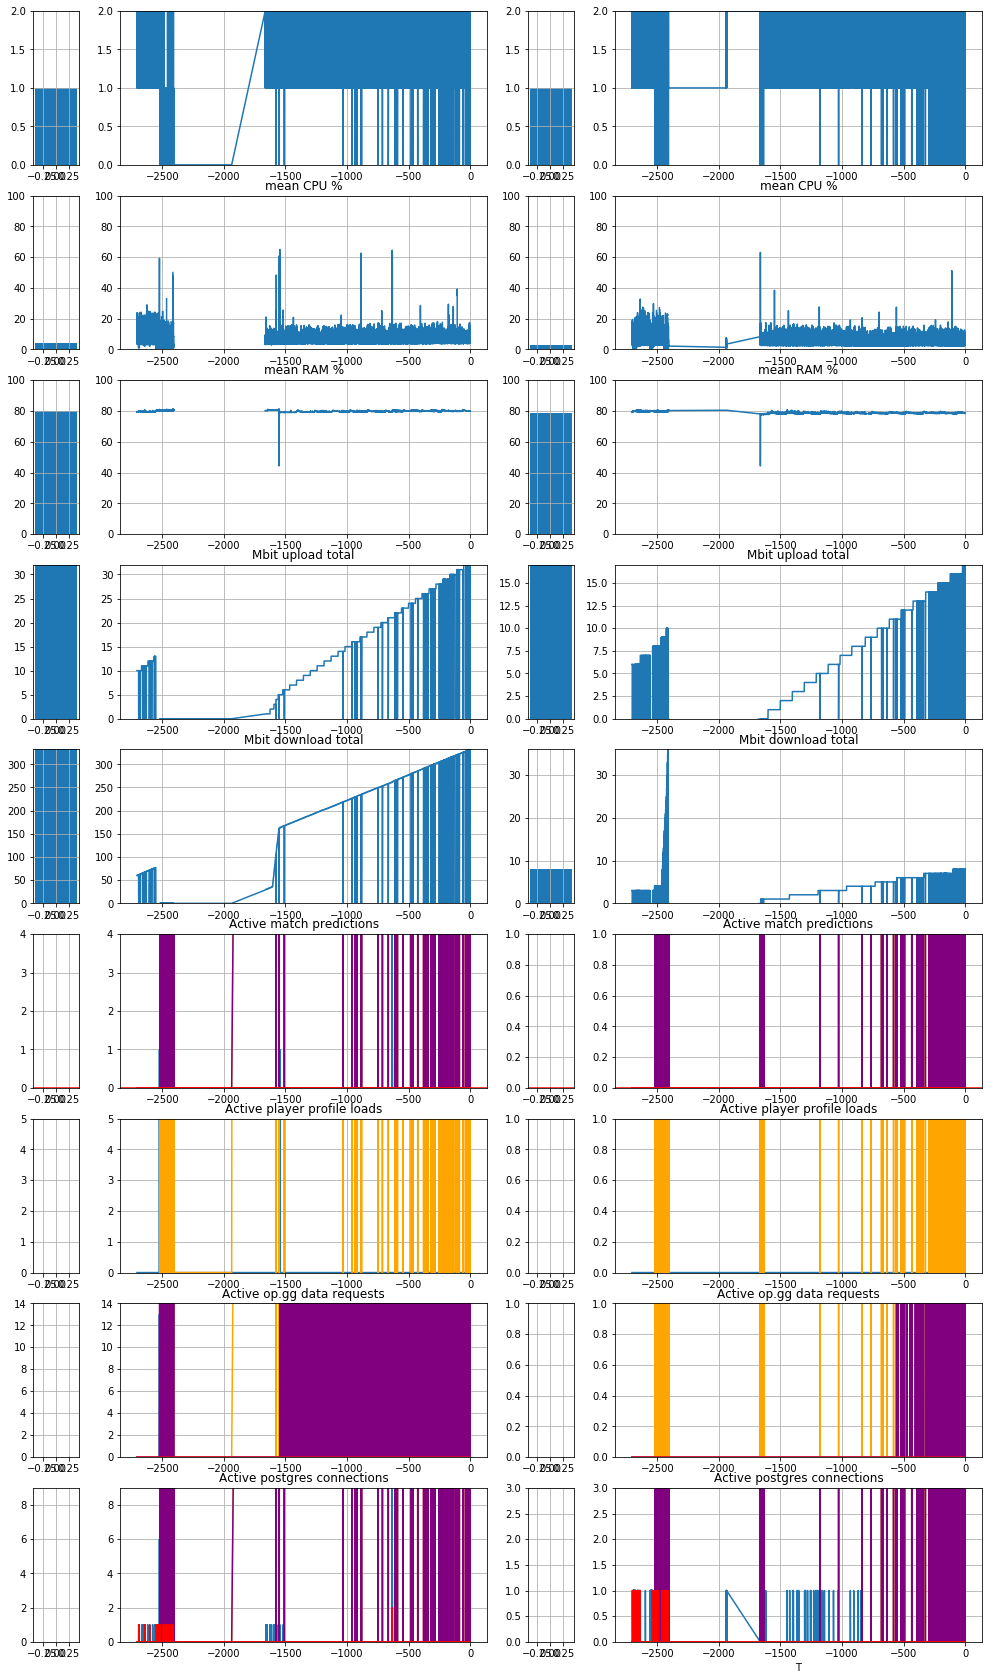

In [ ]:
data = {}
while True:
    update_data()
    live_plot(['rest', 'kr'], host_data, title="Lorb Traffic")
    time.sleep(monitoring_interval)